# Projet n°3 - Anticipez les besoins en consommation électrique de bâtiments - partie 3 - modélisation et prévision de l'émission de CO2

### Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math
import warnings
import time

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
warnings.filterwarnings('ignore')

### Importation des données

In [3]:
df = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet3/prepared_data.csv")
y_full = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet3/y.csv")

### Mise de coté de l'energystarscore pour mesure de l'impact

In [4]:
ess = df['ENERGYSTARScore']
df.drop('ENERGYSTARScore', axis=1, inplace=True)

### Séparation des données

In [5]:
X = df.copy()

In [6]:
y_full

,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),GHGEmissions(MetricTonsCO2e)_log,SiteEnergyUse(kBtu)_log
0,6.252842e+06,208.46,2.37,5.344533,15.648547
1,4.587231e+06,170.00,2.51,5.141664,15.338787
2,1.454222e+06,35.17,0.56,3.588230,14.189982
3,3.880806e+06,102.08,1.04,4.635505,15.171554
4,4.341706e+06,125.57,1.69,4.840796,15.283778
...,...,...,...,...,...
4324,3.552185e+06,96.90,0.47,4.583947,15.083074
4325,7.898472e+05,18.88,0.93,2.989714,13.579596
4326,5.026677e+05,3.50,0.26,1.504077,13.127687
4327,3.878100e+05,7.79,0.51,2.173615,12.868273


In [7]:
y=y_full['GHGEmissions(MetricTonsCO2e)']

In [8]:
y_log = y_full['GHGEmissions(MetricTonsCO2e)_log']

In [9]:
columns_to_standardized = ['CouncilDistrictCode','YearBuilt','NumberofFloors','LargestPropertyUseTypeGFA','Latitude','Longitude']
ss = StandardScaler()
X[columns_to_standardized] = ss.fit_transform(X[columns_to_standardized])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  
                                         test_size = 0.2, 
                                         random_state = 20)

In [11]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X,y_log,  
                                         test_size = 0.2, 
                                         random_state = 20)

In [12]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

0
0
0
0


## Modélisation - Partie 1 - travail sans log

### Modèles de régression

#### Linear Regression

In [13]:
lr = LinearRegression().fit(X_train,y_train)

In [14]:
lr.coef_

array([ 1.39243246e+00,  5.36927039e-01, -8.20639671e-01, -6.55321517e-01,
        2.14099682e+00, -1.43993349e+00, -6.18831650e-01, -1.27422937e+14,
       -9.07027314e+13, -1.27422937e+14, -1.27422937e+14, -1.27422937e+14,
       -1.27422937e+14, -1.27422937e+14, -3.71874048e+13, -3.71874048e+13,
       -7.39076103e+13, -3.71874048e+13, -3.71874048e+13, -3.71874048e+13,
       -3.71874048e+13, -3.71874048e+13, -3.71874048e+13, -3.71874048e+13,
       -3.71874048e+13, -3.71874048e+13, -3.95138247e+11, -3.71874048e+13,
       -3.71874048e+13, -3.71874048e+13, -3.71874048e+13, -3.71874048e+13,
       -3.71874048e+13, -3.71874048e+13, -3.71874048e+13, -3.71874048e+13,
       -3.71874048e+13, -3.71874048e+13, -3.71874048e+13, -1.17118583e+14,
       -1.17118583e+14, -1.17118583e+14, -1.17118583e+14, -1.17118583e+14,
       -1.17118583e+14, -1.17118583e+14, -1.17118583e+14, -1.17118583e+14,
       -1.17118583e+14, -1.17118583e+14, -1.17118583e+14, -1.17118583e+14,
       -1.17118583e+14, -

In [15]:
lr.intercept_

281728924228721.25

In [16]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.021255874381780226
-0.005446201354333047


#### Ridge

In [17]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.02664053808131228
0.006304673056863663


In [18]:
ridge1 = Ridge(alpha = 1).fit(X_train,y_train)
print(ridge1.score(X_train,y_train))
print(ridge1.score(X_test,y_test))

0.025925593745285802
0.0065100123486317996


In [19]:
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.020799699223069124
0.005992862090824946


#### Lasso

In [20]:
lasso0001 = Lasso(alpha = 0.001, max_iter= 10000).fit(X_train,y_train)
print(lasso0001.score(X_train,y_train))
print(lasso0001.score(X_test,y_test))

0.026647309849042067
0.006275826377115767


In [21]:
lasso001 = Lasso(alpha = 0.01, max_iter= 10000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))

0.026032307539173627
0.005774062779925759


In [22]:
lasso01 = Lasso(alpha = 0.1, max_iter= 10000).fit(X_train,y_train)
print(lasso01.score(X_train,y_train))
print(lasso01.score(X_test,y_test))

0.013301067159006141
0.0031088186247361094


In [23]:
lasso1 = Lasso(alpha = 1, max_iter= 10000).fit(X_train,y_train)
print(lasso1.score(X_train,y_train))
print(lasso1.score(X_test,y_test))

0.0023100019173950548
7.977302809769604e-05


In [24]:
lasso10 = Lasso(alpha = 10, max_iter= 10000).fit(X_train,y_train)
print(lasso10.score(X_train,y_train))
print(lasso10.score(X_test,y_test))

0.0
-0.00020586293798596778


#### Sélection de modèle

On stock les résultats de nos modèles dans le tableau "results"

In [25]:
results = pd.DataFrame({})

In [26]:
a = time.time()

In [27]:
parameters = {'tol' : [0.1,0.01,0.001],
              "alpha": [0.001, 0.01, 0.1],  #alpha, coef pénalité
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 Lasso, 0 Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [28]:
b = time.time()

In [29]:
b-a

32.22949481010437

In [30]:
elastic_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.2, 'tol': 0.01}

In [31]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

#### Visualisation

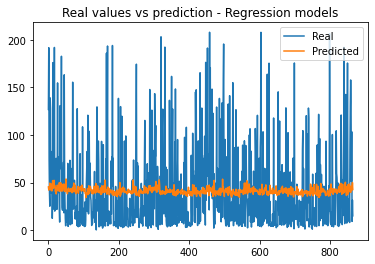

In [32]:
plt.title("Real values vs prediction - Regression models")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)'], label = "Real")
plt.plot(elastic_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

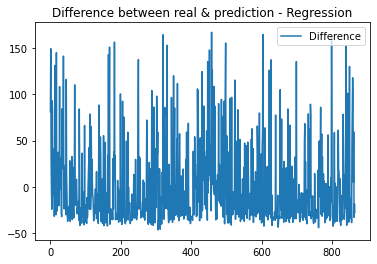

In [33]:
plt.title("Difference between real & prediction - Regression")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)']-elastic_grid.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [34]:
a = time.time()

In [35]:
parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],  #alpha, coef pénalité
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 Lasso, 0 Ridge


elastic_grid2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid2.fit(X_train, y_train_log)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [36]:
b = time.time()

In [37]:
b-a

73.8751118183136

In [38]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(elastic_grid2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

### Random forest

In [39]:
parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [40]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.8s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.5s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.6s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.7s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.7s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [41]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}

In [42]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [43]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

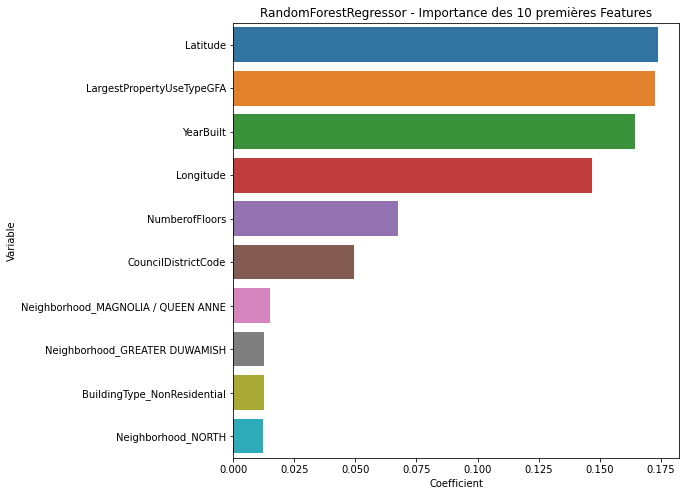

In [44]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 10 premières Features')
sb.barplot(y = liste_coefs_rer['Variable'].head(10),
            x = liste_coefs_rer['Coefficient'].head(10))
plt.show()

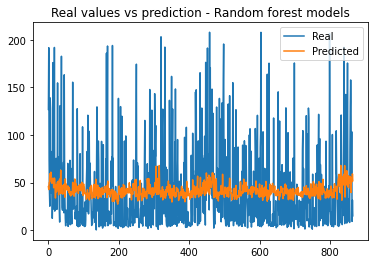

In [45]:
plt.title("Real values vs prediction - Random forest models")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)'], label = "Real")
plt.plot(rfr_search.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

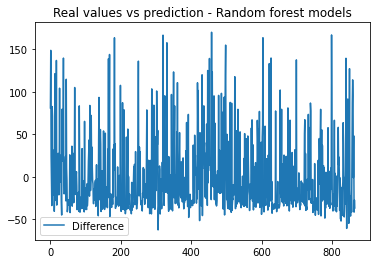

In [46]:
plt.title("Real values vs prediction - Random forest models")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)']-rfr_search.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [47]:
parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

rfr_search2.fit(X_train, y_train_log)

results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor (with log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(rfr_search2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.5s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.5s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.5s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.5s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   4.4s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   1.0s


### SVR

In [48]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.5s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             verbose=2)

In [49]:
svm.best_params_

{'C': 0.001, 'epsilon': 0.1, 'gamma': 1e-08}

In [50]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

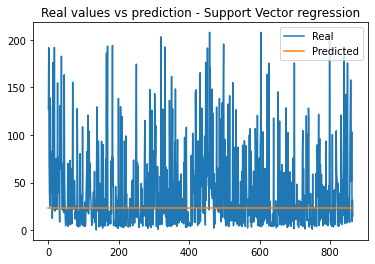

In [51]:
plt.title("Real values vs prediction - Support Vector regression")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)'], label = "Real")
plt.plot(svm.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

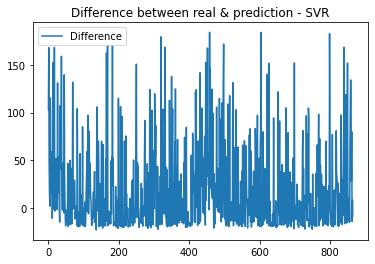

In [52]:
plt.title("Difference between real & prediction - SVR")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)']-svm.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [53]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm2 = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

svm2.fit(X_train, y_train_log)
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine(with log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(svm2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.6s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.5s
[CV] END ...................

## XG Boost 

In [54]:
parameters = {
    'n_estimators' : [40,50,60,100,200,500]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=40;, score=-0.142 total time=   1.8s
[CV 2/5] END ..................n_estimators=40;, score=-0.045 total time=   0.2s
[CV 3/5] END ..................n_estimators=40;, score=-0.144 total time=   0.2s
[CV 4/5] END ..................n_estimators=40;, score=-0.042 total time=   0.2s
[CV 5/5] END ..................n_estimators=40;, score=-0.102 total time=   0.2s
[CV 1/5] END ..................n_estimators=50;, score=-0.150 total time=   0.2s
[CV 2/5] END ..................n_estimators=50;, score=-0.061 total time=   0.2s
[CV 3/5] END ..................n_estimators=50;, score=-0.157 total time=   0.2s
[CV 4/5] END ..................n_estimators=50;, score=-0.058 total time=   0.2s
[CV 5/5] END ..................n_estimators=50;, score=-0.129 total time=   0.2s
[CV 1/5] END ..................n_estimators=60;, score=-0.161 total time=   0.2s
[CV 2/5] END ..................n_estimators=60;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [55]:
xgb_grid.best_params_

{'n_estimators': 40}

In [56]:
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

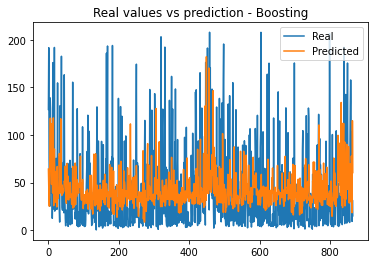

In [57]:
plt.title("Real values vs prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)'], label = "Real")
plt.plot(xgb_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

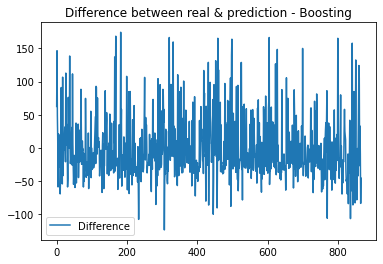

In [58]:
plt.title("Difference between real & prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)']-xgb_grid.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [59]:
parameters = {
    'n_estimators' : [40,50,60,100,200,500]
}

xgb_grid2 = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid2.fit(X_train, y_train_log)

results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost (with log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(np.exp(xgb_grid2.predict(X_test))-1, y_test))]}),
              ignore_index=True)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=40;, score=-0.073 total time=   0.2s
[CV 2/5] END ..................n_estimators=40;, score=-0.059 total time=   0.2s
[CV 3/5] END ..................n_estimators=40;, score=-0.099 total time=   0.2s
[CV 4/5] END ..................n_estimators=40;, score=-0.043 total time=   0.2s
[CV 5/5] END ..................n_estimators=40;, score=-0.058 total time=   0.2s
[CV 1/5] END ..................n_estimators=50;, score=-0.088 total time=   0.3s
[CV 2/5] END ..................n_estimators=50;, score=-0.077 total time=   0.2s
[CV 3/5] END ..................n_estimators=50;, score=-0.127 total time=   0.2s
[CV 4/5] END ..................n_estimators=50;, score=-0.049 total time=   0.3s
[CV 5/5] END ..................n_estimators=50;, score=-0.072 total time=   0.2s
[CV 1/5] END ..................n_estimators=60;, score=-0.104 total time=   0.3s
[CV 2/5] END ..................n_estimators=60;, 

### Résultats compilés pour comparaison

In [60]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

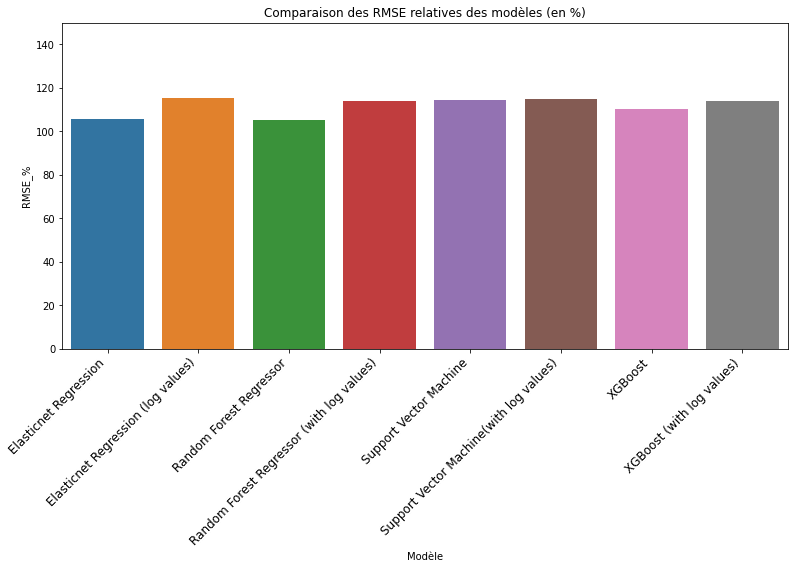

In [61]:
plt.figure(figsize=(13,6))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sb.barplot(x = results['Modèle'],
           y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                            rotation=45,
                     horizontalalignment='right',
                     size=12
                     )
ax = plt.gca()
ax.set_ylim([0, 150])
plt.show()

## Modélisation - Partie 2 - travail avec log - travail sans l'energystarscore pour comparaison

In [62]:
results1 = pd.DataFrame({})

### Regression

In [63]:
parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],  #alpha, coef pénalité
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 Lasso, 0 Ridge


elastic_grid2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

elastic_grid2.fit(X_train, y_train_log)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [64]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid2.predict(X_test), y_test_log))]}),
              ignore_index=True)

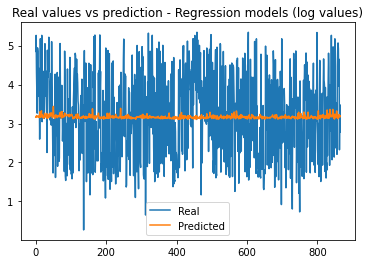

In [65]:
plt.title("Real values vs prediction - Regression models (log values)")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(elastic_grid2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

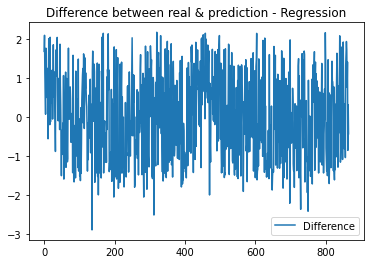

In [66]:
plt.title("Difference between real & prediction - Regression")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-elastic_grid2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### RandomForest

In [67]:
parameters = {
    'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

rfr_search2.fit(X_train, y_train_log)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.7s
[CV] END max_

[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total ti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300]},
             verbose=2)

In [68]:
rfr_search2.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 300}

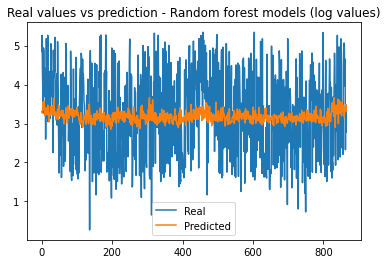

In [69]:
plt.title("Real values vs prediction - Random forest models (log values)")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(rfr_search2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

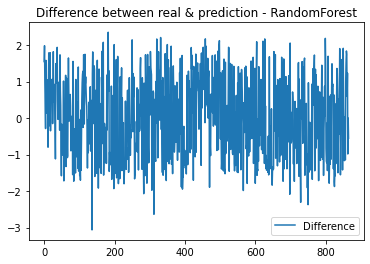

In [70]:
plt.title("Difference between real & prediction - RandomForest")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-rfr_search2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [71]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search2.predict(X_test), y_test_log))]}),
              ignore_index=True)

### SVR

In [72]:
parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm2 = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

svm2.fit(X_train, y_train_log)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001

[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-06; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END .................C=0.01, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0.01, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ................C=0

[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END .................C=0.1, epsilon=0.001, gamma=0.0001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-08; total time=   0.5s
[CV] END ...................

[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-06; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.5s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-05; total time=   0.5s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             verbose=2)

In [73]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm2.predict(X_test), y_test_log))]}),
              ignore_index=True)

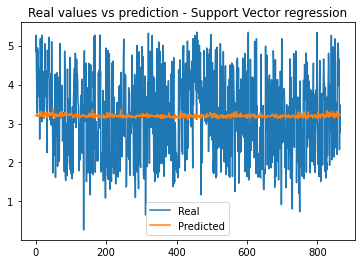

In [74]:
plt.title("Real values vs prediction - Support Vector regression")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(svm2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

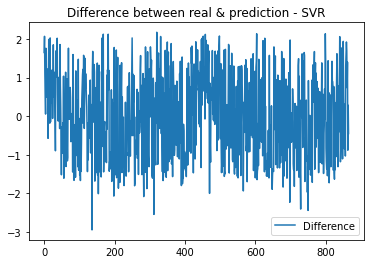

In [75]:
plt.title("Difference between real & prediction - SVR")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-svm2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### XGB

In [76]:
parameters = {
    'n_estimators' : [40,50,60,100,200,500]
}
xgb_grid2 = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid2.fit(X_train, y_train_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..................n_estimators=40;, score=-0.073 total time=   0.2s
[CV 2/5] END ..................n_estimators=40;, score=-0.059 total time=   0.3s
[CV 3/5] END ..................n_estimators=40;, score=-0.099 total time=   0.3s
[CV 4/5] END ..................n_estimators=40;, score=-0.043 total time=   0.3s
[CV 5/5] END ..................n_estimators=40;, score=-0.058 total time=   0.3s
[CV 1/5] END ..................n_estimators=50;, score=-0.088 total time=   0.2s
[CV 2/5] END ..................n_estimators=50;, score=-0.077 total time=   0.2s
[CV 3/5] END ..................n_estimators=50;, score=-0.127 total time=   0.2s
[CV 4/5] END ..................n_estimators=50;, score=-0.049 total time=   0.2s
[CV 5/5] END ..................n_estimators=50;, score=-0.072 total time=   0.2s
[CV 1/5] END ..................n_estimators=60;, score=-0.104 total time=   0.2s
[CV 2/5] END ..................n_estimators=60;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [77]:
results1 = results1.append(pd.DataFrame({
    'Modèle' : ['XGBoost (log values)'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid2.predict(X_test), y_test_log))]}),
              ignore_index=True)

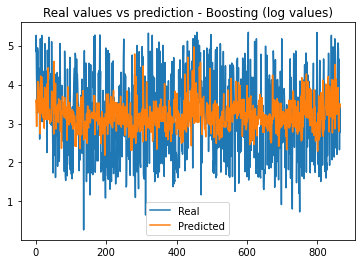

In [78]:
plt.title("Real values vs prediction - Boosting (log values)")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(xgb_grid2.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

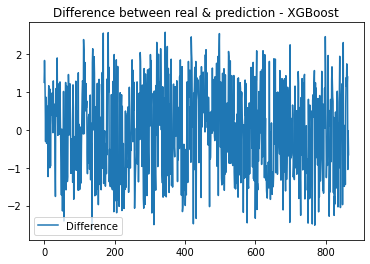

In [79]:
plt.title("Difference between real & prediction - XGBoost")
plt.plot(y_test_log.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-xgb_grid2.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [80]:
results1['RMSE_%'] = results1['Score_RMSE'].divide(y_test_log.mean())

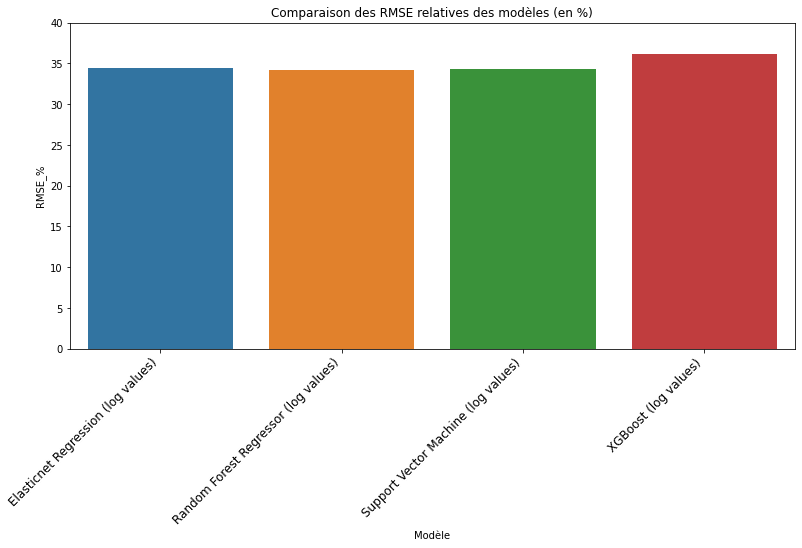

In [81]:
plt.figure(figsize=(13,6))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sb.barplot(x = results1['Modèle'],
           y = results1['RMSE_%']*100)
chart.set_xticklabels(labels = results1['Modèle'], 
                            rotation=45,
                     horizontalalignment='right',
                     size=12
                     )
ax = plt.gca()
ax.set_ylim([0, 40])
plt.show()

## Modélisation - Partie 3 - travail avec log - travail avec l'energystarscore pour comparaison

### Modèles de régression

#### Linear Regression

In [82]:
y = y_full['GHGEmissions(MetricTonsCO2e)_log']

In [83]:
df = pd.read_csv("/home/fayz/Documents/OpenClassrooms/Projet3/prepared_data.csv")
X = df.copy()
columns_to_standardized = ['CouncilDistrictCode','YearBuilt','NumberofFloors','LargestPropertyUseTypeGFA','Latitude','Longitude']
ss = StandardScaler()
X[columns_to_standardized] = ss.fit_transform(X[columns_to_standardized])
X_train, X_test, y_train, y_test = train_test_split(X,y,  
                                         test_size = 0.2, 
                                         random_state = 20)

In [84]:
lr = LinearRegression().fit(X_train,y_train)

lr.coef_

array([ 1.79702926e-02,  6.98939902e-03, -3.93124843e-03, -1.57532042e-02,
        5.45671348e-02,  7.21062444e-04, -4.45951445e-02, -1.45645838e-02,
        3.07164000e-01, -7.84550649e-02, -3.09601719e-01, -9.57650376e-02,
       -1.06832055e-01,  4.02195274e-01, -1.18705397e-01,  1.44658835e-02,
       -2.02957666e-01, -7.84550649e-02, -7.87492309e-01,  1.47626096e-02,
        9.56022599e-02,  3.02081807e-02,  1.11616905e-01, -3.54066444e-01,
       -1.97129346e-01, -1.20201911e-01,  4.57691574e-02,  5.82867088e-16,
       -6.77445082e-02, -9.87375942e-01, -4.00825805e-01,  6.46189458e-01,
       -2.17025061e-01,  1.98057748e+00, -2.57160666e-01, -2.24709052e-01,
        7.69205403e-01,  5.86808379e-01, -1.25053094e-01, -2.75008843e-01,
        1.42005549e-02, -9.83428271e-01,  3.79614633e-02, -1.96531805e-01,
       -6.57255554e-02,  1.54175399e-01,  3.63854589e-02,  8.85243737e-02,
        1.31669953e-01,  1.57842358e-01,  1.00379952e-01,  2.11647573e-01,
        9.17873079e-02,  

In [85]:
lr.intercept_

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.02403396418763959
0.005480556247985935


#### Ridge

In [86]:
ridge01 = Ridge(alpha = 0.1).fit(X_train,y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))
print()
ridge1 = Ridge(alpha = 1).fit(X_train,y_train)
print(ridge1.score(X_train,y_train))
print(ridge1.score(X_test,y_test))
print()
ridge10 = Ridge(alpha = 10).fit(X_train,y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.024027653856214193
0.005606812193792776

0.023686080037182755
0.006437003597101643

0.020153917963407375
0.007570845508049429


#### Lasso

In [87]:
lasso0001 = Lasso(alpha = 0.001, max_iter= 100000).fit(X_train,y_train)
print(lasso0001.score(X_train,y_train))
print(lasso0001.score(X_test,y_test))
print()
lasso001 = Lasso(alpha = 0.01, max_iter= 100000).fit(X_train,y_train)
print(lasso001.score(X_train,y_train))
print(lasso001.score(X_test,y_test))
print()
lasso01 = Lasso(alpha = 0.1, max_iter= 100000).fit(X_train,y_train)
print(lasso01.score(X_train,y_train))
print(lasso01.score(X_test,y_test))
print()
lasso1 = Lasso(alpha = 1, max_iter= 100000).fit(X_train,y_train)
print(lasso1.score(X_train,y_train))
print(lasso1.score(X_test,y_test))
print()
lasso10 = Lasso(alpha = 10, max_iter= 100000).fit(X_train,y_train)
print(lasso10.score(X_train,y_train))
print(lasso10.score(X_test,y_test))


0.01841514396941879
0.008995930418387421

0.0051289667244821535
0.00184413199077893

0.00034138453180099226
-0.0013400599270920743

0.0
-0.0010639359034114726

0.0
-0.0010639359034114726


#### Sélection de modèle

In [88]:
results2 = pd.DataFrame({})

parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}#L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

In [89]:
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [90]:
elastic_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.2, 'tol': 0.1}

In [91]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

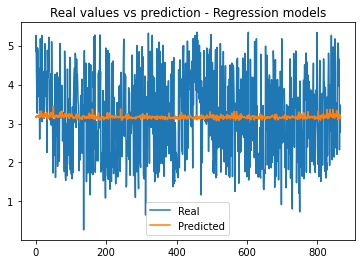

In [92]:
plt.title("Real values vs prediction - Regression models")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(elastic_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

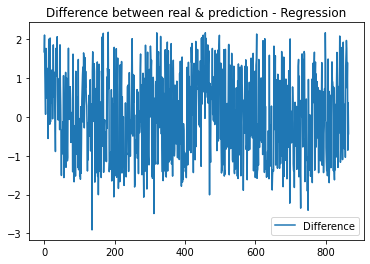

In [93]:
plt.title("Difference between real & prediction - Regression")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-elastic_grid.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

### Random forest

In [94]:
parameters = {
    'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

In [95]:
rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.8s
[CV] END max_

[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   1.2s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total ti

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300]},
             verbose=2)

In [96]:
rfr_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}

In [97]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

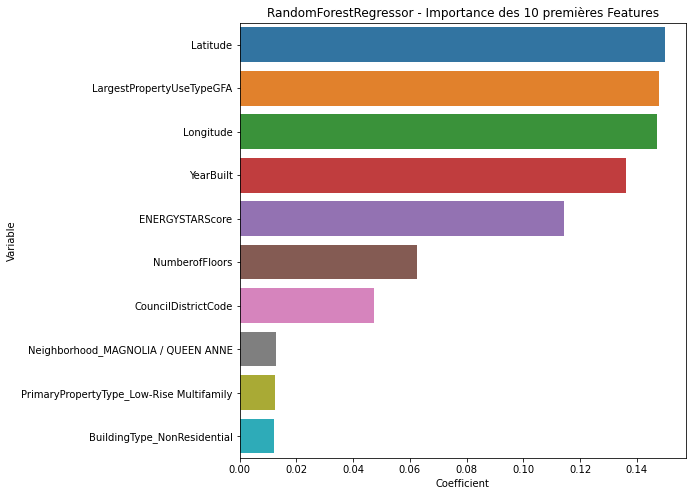

In [98]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 10 premières Features')
sb.barplot(y = liste_coefs_rer['Variable'].head(10),
            x = liste_coefs_rer['Coefficient'].head(10))
plt.show()

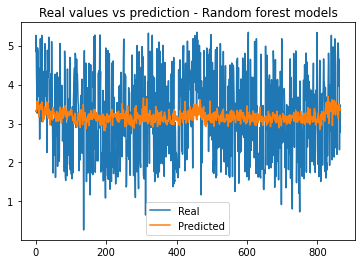

In [99]:
plt.title("Real values vs prediction - Random forest models")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(rfr_search.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

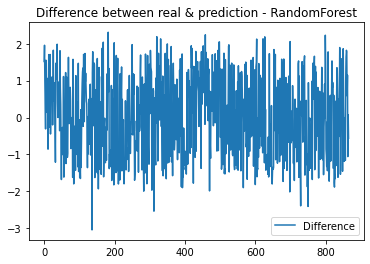

In [124]:
plt.title("Difference between real & prediction - RandomForest")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-rfr_search.predict(X_test.sort_index()), label = "Difference")
plt.legend()
plt.show()

In [141]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

### SVR

In [101]:
parameters = {'gamma' : [1e-5, 1e-4, 1e-3], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      cv=5,
                   verbose=2
                     )

In [102]:
svm.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-05; total time=   0.5s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-05; total time=   0.7s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-05; total time=   0.6s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.6s
[CV] END ...............C=0.001, epsilon=0.001, gamma=0.0001; total time=   0.7s
[CV] END ................C=0.001, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ................C=0.001, epsilon=0.001

[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.001, gamma=0.001; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ...................C=0.1, epsilon=0.01, gamma=1e-05; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.01, gamma=0.0001; total time=   0.5s
[CV] END ..................C=0.1, epsilon=0.01, gamma=0.0001; total time=   0.6s
[CV] END ..................C=0.1, epsilon=0.01, gamma=0.0001; total time=   0.6s
[CV] END ..................C

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [1e-05, 0.0001, 0.001]},
             verbose=2)

In [103]:
svm.best_params_

{'C': 1, 'epsilon': 0.1, 'gamma': 0.0001}

In [104]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

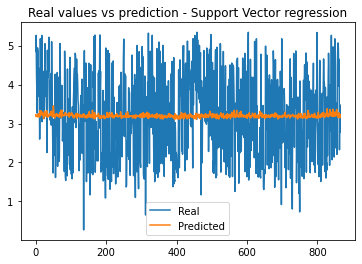

In [105]:
plt.title("Real values vs prediction - Support Vector regression")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(svm.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

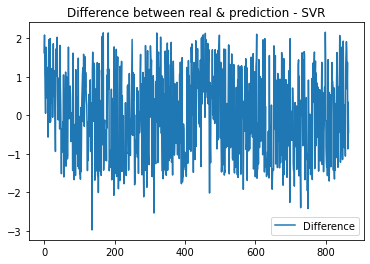

In [106]:
plt.title("Difference between real & prediction - SVR")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-svm.predict(X_test.sort_index()), label = "Difference")
#plt.plot(svm.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

### XGBoost

In [107]:
parameters = {
    'n_estimators' : [100,500,1000]}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .................n_estimators=100;, score=-0.169 total time=   0.4s
[CV 2/5] END .................n_estimators=100;, score=-0.144 total time=   0.4s
[CV 3/5] END .................n_estimators=100;, score=-0.207 total time=   0.4s
[CV 4/5] END .................n_estimators=100;, score=-0.135 total time=   0.4s
[CV 5/5] END .................n_estimators=100;, score=-0.197 total time=   0.4s
[CV 1/5] END .................n_estimators=500;, score=-0.299 total time=   2.0s
[CV 2/5] END .................n_estimators=500;, score=-0.258 total time=   2.3s
[CV 3/5] END .................n_estimators=500;, score=-0.329 total time=   2.2s
[CV 4/5] END .................n_estimators=500;, score=-0.218 total time=   3.0s
[CV 5/5] END .................n_estimators=500;, score=-0.324 total time=   2.8s
[CV 1/5] END ................n_estimators=1000;, score=-0.305 total time=   4.0s
[CV 2/5] END ................n_estimators=1000;, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [108]:
results2 = results2.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

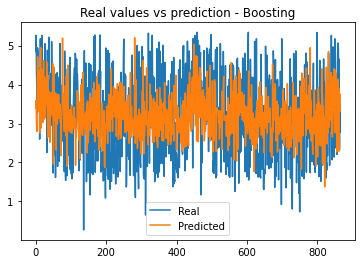

In [109]:
plt.title("Real values vs prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log'], label = "Real")
plt.plot(xgb_grid.predict(X_test.sort_index()), label = "Predicted")
plt.legend()
plt.show()

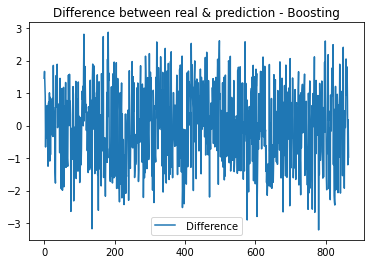

In [150]:
plt.title("Difference between real & prediction - Boosting")
plt.plot(y_test.sort_index().reset_index()['GHGEmissions(MetricTonsCO2e)_log']-xgb_grid.predict(X_test.sort_index()), label =" Difference")
#plt.plot(, label = "Predicted")
plt.legend()
plt.show()

In [111]:
results2['RMSE_%'] = results2['Score_RMSE'].divide(y_test.mean())

In [112]:
results2

,Modèle,Score_RMSE,RMSE_%
0,Elasticnet Regression,1.101527,0.343810
1,Random Forest Regressor,1.096255,0.342165
2,Support Vector Machine,1.100441,0.343471
3,XGBoost,1.197111,0.373644


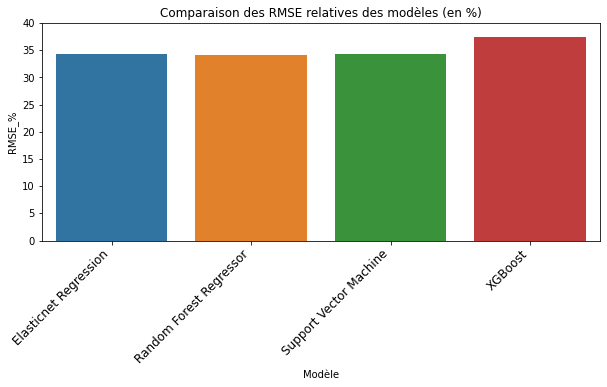

In [113]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sb.barplot(x = results2['Modèle'],
           y = results2['RMSE_%']*100)
chart.set_xticklabels(labels = results2['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 40])
plt.show()